In [16]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [17]:
df_train = pd.read_csv('./train.csv')

In [18]:
#Extend the df by splitting the datetime into new categories
df_train['year'] = df_train.datetime.apply(lambda x: x.split()[0].split('-')[0]).astype(str).astype(int)
df_train['month'] = df_train.datetime.apply(lambda x: x.split()[0].split('-')[1]).astype(str).astype(int)
df_train['day'] = df_train.datetime.apply(lambda x: x.split()[0].split('-')[2]).astype(str).astype(int)
df_train['hour'] = df_train.datetime.apply(lambda x : x.split()[1].split(":")[0]).astype(str).astype(int)

#Infer Day Name
sr = pd.to_datetime(df_train['datetime']) 
df_train['Day_name'] = sr.dt.day_name()

#Season List 
season_dict = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df_train['Season_Exp'] = df_train['season'].map(season_dict)

#Weather List
weather_dict = {1:'clear' , 2:'mist' , 3:'light_precip' , 4: 'heavy_precip' }
df_train['Weather_Exp'] = df_train['weather'].map(weather_dict)

#Season Reconvert
new_season = {'Spring': 0, 'Winter': 1, 'Summer': 2, 'Fall': 3}
df_train['Season_Reconvert'] = df_train['Season_Exp'].map(new_season)

#Day Reconvert
day_new = {'Sunday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Monday': 3, 'Friday': 4, 'Thursday': 5, 'Saturday': 6}
df_train['Day_Reconvert'] = df_train['Day_name'].map(day_new)

#Hour Binning
hour_range = range(0,24)
bins = ['Night']*6 + ['Morning']*4 + ['Day']*7 + ['Evening']*7
hour_new = dict(zip(hour_range, bins))
df_train['Hour_binned'] = df_train['hour'].map(hour_new)

#Hour_Dict_Factorization_Low Level
factor_hour = {'Night': 0, 'Morning':1, 'Day': 2, 'Evening': 3}
df_train['Hour_Reconvert'] = df_train['Hour_binned'].map(factor_hour)


In [19]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,month,day,hour,Day_name,Season_Exp,Weather_Exp,Season_Reconvert,Day_Reconvert,Hour_binned,Hour_Reconvert
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,1,1,0,Saturday,Spring,clear,0,6,Night,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,1,1,1,Saturday,Spring,clear,0,6,Night,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,1,1,2,Saturday,Spring,clear,0,6,Night,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,1,1,3,Saturday,Spring,clear,0,6,Night,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,1,1,4,Saturday,Spring,clear,0,6,Night,0


## Target Encode a Subset of Columns ##

In [20]:
df_train.groupby('month')['count'].mean()

month
1      90.366516
2     110.003330
3     148.169811
4     184.160616
5     219.459430
6     242.031798
7     235.325658
8     234.118421
9     233.805281
10    227.699232
11    193.677278
12    175.614035
Name: count, dtype: float64

In [21]:
all_columns = list(df_train.columns)

In [22]:
all_columns

['datetime',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'count',
 'year',
 'month',
 'day',
 'hour',
 'Day_name',
 'Season_Exp',
 'Weather_Exp',
 'Season_Reconvert',
 'Day_Reconvert',
 'Hour_binned',
 'Hour_Reconvert']

In [23]:
df_te_train = df_train

In [24]:
df_te_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,month,day,hour,Day_name,Season_Exp,Weather_Exp,Season_Reconvert,Day_Reconvert,Hour_binned,Hour_Reconvert
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,...,1,1,0,Saturday,Spring,clear,0,6,Night,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,...,1,1,1,Saturday,Spring,clear,0,6,Night,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,...,1,1,2,Saturday,Spring,clear,0,6,Night,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,...,1,1,3,Saturday,Spring,clear,0,6,Night,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,...,1,1,4,Saturday,Spring,clear,0,6,Night,0


In [106]:
#Target Encoding a Subset of columns with MEAN


#Subset of large var list
column_list_to_target_encode = ['Season_Reconvert','Weather_Exp','year','month', 'Day_Reconvert', 'hour']
for column in column_list_to_target_encode:
    target_means = df_te_train.groupby(column).sum()
    df_te_train[f'{column}_te'] = df_te_train[column].replace(target_means['count'])



In [107]:
#List Conventions to define a training dataset

#for Categoricals
te = '_te'
te_list = [x + te for x in column_list_to_target_encode]
te_list

#poly_list = ['hour', 'hour_2', 'hour_3']
num_list = ['atemp', 'windspeed']
#num_list_3 = ['holiday','workingday', 'atemp', 'windspeed' ]
te_list.extend(num_list)
#te_list.extend(poly_list)
te_list
#num_list_3

['Season_Reconvert_te',
 'Weather_Exp_te',
 'year_te',
 'month_te',
 'Day_Reconvert_te',
 'hour_te',
 'atemp',
 'windspeed']

In [108]:
#df_te_train['hour_2'] = df_te_train['hour']**2
#df_te_train['hour_3'] = df_te_train['hour']**3

In [109]:
#Define Xtrain and ytrain
Xtrain = df_te_train[te_list]
#Xtrain = Xsub.values.reshape(-1,1)

#Convert ytrain to log1p because you need to collapse the count numbers across all scales of x
ytrain = np.log1p(df_te_train['count'])

In [110]:
Xtrain.corr()

,Season_Reconvert_te,Weather_Exp_te,year_te,month_te,Day_Reconvert_te,hour_te,atemp,windspeed
Season_Reconvert_te,1.000000,0.022159,-0.005961,0.914305,-0.016792,-0.008499,0.690096,-0.127092
Weather_Exp_te,0.022159,1.000000,0.006155,0.025814,0.036004,0.004367,0.056663,0.004604
year_te,-0.005961,0.006155,1.000000,-0.005985,-0.015408,-0.004407,0.058540,-0.015221
month_te,0.914305,0.025814,-0.005985,1.000000,-0.006531,-0.008663,0.765269,-0.130938
Day_Reconvert_te,-0.016792,0.036004,-0.015408,-0.006531,1.000000,-0.001834,-0.028806,0.000992
hour_te,-0.008499,0.004367,-0.004407,-0.008663,-0.001834,1.000000,0.163985,0.211783
atemp,0.690096,0.056663,0.058540,0.765269,-0.028806,0.163985,1.000000,-0.057473
windspeed,-0.127092,0.004604,-0.015221,-0.130938,0.000992,0.211783,-0.057473,1.000000


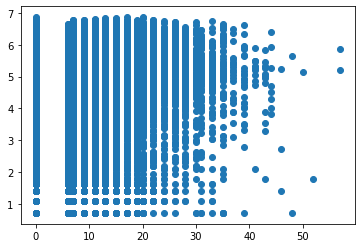

In [111]:
plt.scatter(df_te_train['windspeed'], ytrain)

In [112]:
#Scikit Linear Reg
m = LinearRegression()


In [113]:
m.fit(Xtrain, ytrain), m.score(Xtrain, ytrain)

(LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
          normalize=False), 0.6871020542446611)

In [114]:
ypred = m.predict(Xtrain)
mean_squared_error(ytrain, ypred) #Scikit

0.6303845697450777

In [115]:
def rmsle(ytrue, ypred,convertExp=True):
    if convertExp:
        ytrue = np.exp(ytrue),
        ypred = np.exp(ypred)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [116]:
print ("RMSLE Value For Linear Regression: ",rmsle(np.exp(ytrain),np.exp(ypred),False))

UnboundLocalError: local variable 'y' referenced before assignment

In [99]:
m.coef_ , m.intercept_, Xtrain.columns
l = zip(Xtrain.columns, m.coef_)
fit_coeff = pd.DataFrame(l, columns = ['Variables', 'Coefficients'], index = Xtrain.columns)
fit_coeff.drop('Variables', axis = 1)

,Coefficients
Season_Reconvert_te,3.981094e-07
Weather_Exp_te,2.214644e-07
year_te,9.561390e-07
month_te,3.894481e-06
Day_Reconvert_te,6.103804e-06
hour_te,1.779531e-05
atemp,1.949580e-02
windspeed,-9.034047e-04


In [100]:
from scipy.stats import probplot
import matplotlib.pyplot as plt



7.518431138652079e-16


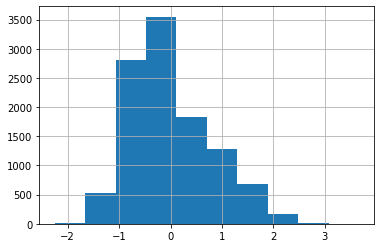

In [101]:
#Check the assumptions
#Mean residual is around zero
residuals = ypred - ytrain
print(residuals.mean())
residuals.hist()


((array([-3.83154229, -3.60754977, -3.48462983, ...,  3.48462983,
          3.60754977,  3.83154229]),
  array([-2.25389122, -1.82436086, -1.77064913, ...,  3.07134535,
          3.09700118,  3.66560515])),
 (0.7782752836926532, 5.568565657577147e-16, 0.9799107428590335))

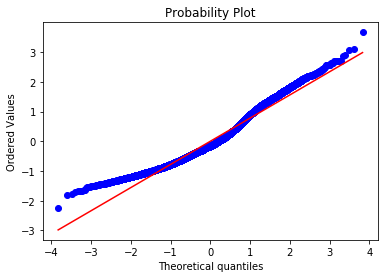

In [102]:
#Q-Q plot
probplot(residuals, plot=plt)

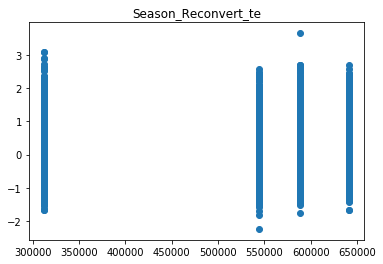

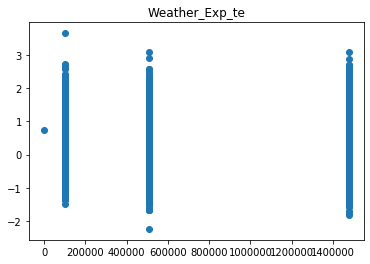

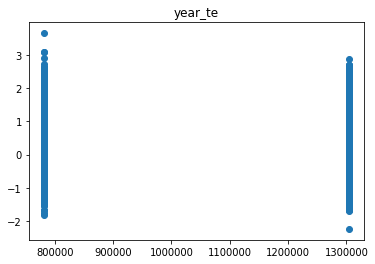

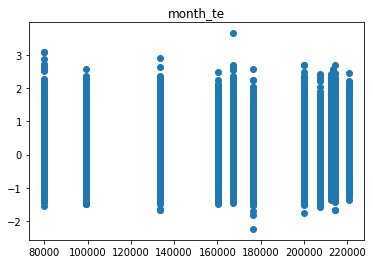

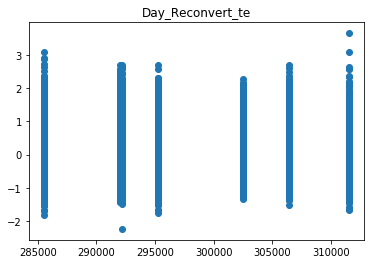

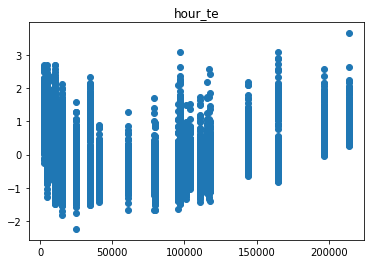

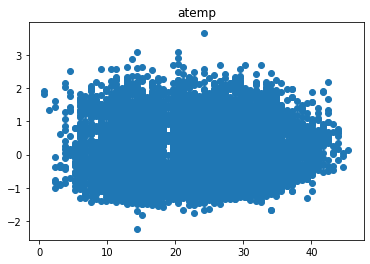

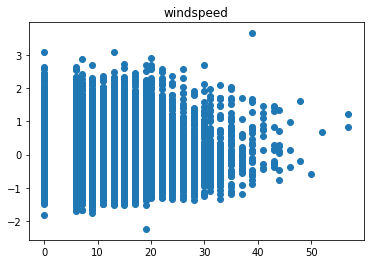

In [103]:
#Residuals uncorrelated with x and must be equally on and under 0

for column in Xtrain.columns:
    plt.scatter(Xtrain[column], residuals)
    plt.title(f'{column}')
    plt.show()
#plt.scatter(Xtrain, residuals)
#Xtrain.shape, residuals.shape